In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_ref = pd.read_csv("../data/md-core.csv")

In [3]:
df_ref_sub = df_ref[['info.name', 'outputs.pure_CO2_kH']]

In [8]:
df1 = pd.read_csv("../data/md_xq/md_cifs_co2_final.csv")
df2 = pd.read_csv("../data/md_xq/md_n2_henry.csv")
df1.rename(columns={"cif": "info.name", "CO2_kh": "outputs.CO2_kh"}, inplace=True)
df2.rename(columns={"cif": "info.name", "N2_kh": "outputs.N2_kh"}, inplace=True)

In [7]:
len(df_ref)

2056

In [9]:
df_compare = df_ref.merge(df1, on="info.name")
df_compare = df_compare.merge(df2, on="info.name")

In [10]:
df_compare["outputs.xq.logKH_CO2"] = np.log(df_compare["outputs.CO2_kh"])
df_compare["outputs.xq.logKH_N2"] = np.log(df_compare["outputs.N2_kh"])

(-0.2, 1.2)

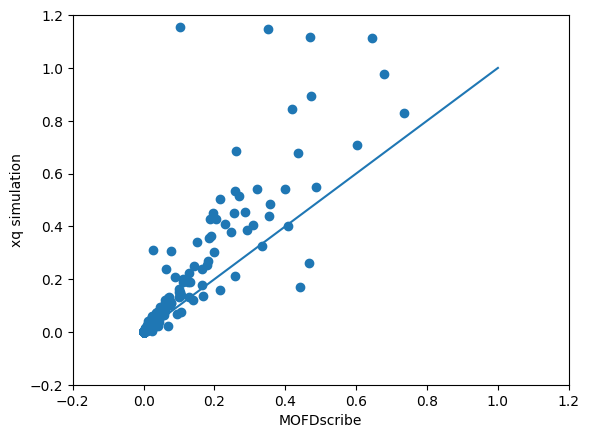

In [11]:
plt.scatter(df_compare["outputs.pure_CO2_kH"], df_compare["outputs.CO2_kh"]) #, yerr=df_compare["CO2_kh_dev"], fmt="o")
plt.plot([0, 1], [0, 1])
plt.xlabel("MOFDscribe")
plt.ylabel("xq simulation")
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])

In [12]:
df_compare

,Unnamed: 0,features.phstats_C-H-N-O_dim1_birth_min,features.phstats_C-H-N-O_dim1_birth_max,features.phstats_C-H-N-O_dim1_birth_mean,features.phstats_C-H-N-O_dim1_birth_std,features.phstats_C-H-N-O_dim1_death_min,features.phstats_C-H-N-O_dim1_death_max,features.phstats_C-H-N-O_dim1_death_mean,features.phstats_C-H-N-O_dim1_death_std,features.phstats_C-H-N-O_dim1_persistence_min,...,info.title,info.abs,info.year,info.name,outputs.CO2_kh,CO2_kh_dev,outputs.N2_kh,N2_kh_dev,outputs.xq.logKH_CO2,outputs.xq.logKH_N2
0,0,0.7036,3.656,1.670,0.3909,1.128,3.682,1.7590,0.3848,6.600000e-07,...,Solvent templates induced porous metal-organic...,© 2015 American Chemical Society. Solvent temp...,2015.0,XULDOZ_clean,0.485124,3.540850e-01,7.177200e-06,7.140870e-07,-0.723351,-11.844601
1,1,0.6940,3.008,1.580,0.3232,1.144,3.027,1.7100,0.2808,2.130000e-05,...,A new Co-based metal-organic framework constru...,A novel Co-based metal-organic framework {[Co4...,2014.0,YOKKIU_clean,0.000490,2.895170e-05,7.030370e-06,5.691070e-08,-7.622038,-11.865271
2,2,0.6914,6.550,1.762,0.6724,1.317,6.590,1.9350,0.7886,2.900000e-06,...,"Synthesis, structures and luminescence propert...",© 2016 The Royal Society of Chemistry. Four no...,2016.0,VAGBUD_clean,0.000058,1.573740e-05,2.520970e-06,1.713800e-08,-9.750579,-12.890867
3,3,0.6960,3.926,1.717,0.6420,1.316,3.947,1.8550,0.6400,6.000000e-08,...,A series of lanthanide metal-organic framework...,A series of isostructural lanthanide metal-org...,2010.0,XADDAJ01_clean,0.169918,1.641400e-01,7.668150e-06,1.135140e-07,-1.772439,-11.778435
4,4,0.6950,5.777,1.859,0.9590,1.295,5.780,2.0210,0.9260,2.400000e-07,...,Systematic syntheses and metalloligand doping ...,© 2015 American Chemical Society. A series of ...,2015.0,ZOZHON_clean,0.000091,7.562100e-07,6.118510e-06,6.241310e-08,-9.303806,-12.004192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,2051,0.6963,7.152,1.713,0.5130,1.229,7.160,1.8090,0.4932,3.190000e-05,...,Chiral direction and interconnection of helica...,The control of the interpenetration and chiral...,2003.0,HUYKUH_clean,0.000007,2.609120e-07,1.810110e-06,5.531280e-08,-11.878050,-13.222123
1949,2052,0.6953,3.959,1.801,0.5815,1.244,3.963,1.8870,0.5470,2.000000e-07,...,A flexible MMOF exhibiting high selectivity fo...,A flexible microporous metal organic framework...,2010.0,MAKXAZ_clean,0.000397,4.400780e-06,1.045400e-05,1.508790e-07,-7.830421,-11.468526
1950,2053,1.2200,2.380,1.540,0.2683,1.252,2.621,1.6455,0.3298,1.600000e-06,...,"Synthesis, structure and magnetic properties o...",Heterometallic compounds comprising copper(II)...,2000.0,WEVRUK_clean,0.000006,1.034480e-07,8.410780e-07,1.028420e-08,-11.959800,-13.988581
1951,2054,1.2510,7.777,2.246,1.9270,1.260,7.780,2.4240,1.9800,8.637000e-05,...,The structure of the aluminum fumarate metal-o...,"© 2015 WILEY-VCH Verlag GmbH & Co. KGaA, Wei...",2015.0,DOYBEA_clean,0.000639,2.356420e-05,1.635920e-05,3.135030e-08,-7.355587,-11.020720


In [13]:
df_compare.to_csv("../data/md-core-xq.csv", index=False)